## Zapisz kopię pliku na dysku iz mień jego nazwę *Python_czyszczenieDanych_ImieNazwisko.jpynb*

Celem tego raportu jest zbadanie związku między budżetem filmu a generowanym przychodem. Analiza ta ma na celu zrozumienie, czy wyższy budżet produkcji filmowej przekłada się na większy dochód na rynku kinowym. Dane użyte w analizie pochodzą z różnych filmów i obejmują informacje dotyczące budżetu produkcji oraz generowanego przychodu.

Używany zbiór składa się z 13 kolumn:
--------------------------------------
Jakościowe:
-----------

Rank - pozycja w top 500

release_date - data premiery

title - tytuł filmu

URL - URL filmu

Mpaa - zakres wiekowy

genere - gatuenk

year - rok produkcji


Ilościowe:
-------------

production_cost - budżet

domestic_gross - przychód w kraju produkcji

worldwide_gross - przychód ogólnoświatowy

opening_weekend - przychód w weekend premiery

theaters - ilość kin, które miały premierę

runtime - długość filmu

Zmienna objaśniana - worldwide_gross
------------------------------------
Zmienna objaśniające - Mpaa, genere, production_cost, theaters, rumtime
-----------------------------------------------------------------------

## Wczytaj biblioteki:
- numpy
- pandas

In [35]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kstest

## Wczytujemy plik "top-500-movies.csv" i wyświetlamy 10 pierwszych wierszy

In [36]:
file_path = 'top-500-movies.csv'
movies_df = pd.read_csv(file_path)

def display_interactive_table(dataframe, num_rows=10):
    display(HTML(dataframe.head(num_rows).to_html()))

display_interactive_table(movies_df)

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Tides#tab=summary,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=summary,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0
5,6,2007-05-24,Pirates of the Caribbean: At World’s End,/movie/Pirates-of-the-Caribbean-At-Worlds-End#tab=summary,300000000,309420425,960996492,114732820.0,PG-13,Adventure,4362.0,167.0,2007.0
6,7,2017-11-13,Justice League,/movie/Justice-League-(2017)#tab=summary,300000000,229024295,655945209,93842239.0,PG-13,Action,4051.0,121.0,2017.0
7,8,2015-10-06,Spectre,/movie/Spectre#tab=summary,300000000,200074175,879500760,70403148.0,PG-13,Action,3929.0,148.0,2015.0
8,9,2023-07-11,Mission: Impossible Dead Reckoning Part One,/movie/Mission-Impossible-Dead-Reckoning-Part-One-(2023)#tab=summary,290000000,0,0,NaN,NaN,Action,NaN,NaN,2023.0
9,10,2019-12-18,Star Wars: The Rise of Skywalker,/movie/Star-Wars-The-Rise-of-Skywalker-(2019)#tab=summary,275000000,515202542,1072848487,177383864.0,PG-13,Adventure,4406.0,142.0,2019.0


Usuwamy wszystkie wartości Nan, NULL i 0

In [37]:
cleaned_data = movies_df.dropna()
cleaned_data = cleaned_data[(cleaned_data != 0).all(axis=1)]
display_interactive_table(cleaned_data, 5)

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Tides#tab=summary,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=summary,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0


Porządkujemy zbiór względem zmiennej objaśnianej (worldwide_gross)
-----------------------------------------------

In [38]:
sorted_df = cleaned_data.sort_values(by='worldwide_gross', ascending=False)

display_interactive_table(sorted_df)

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
24,25,2009-12-17,Avatar,/movie/Avatar#tab=summary,237000000,785221649,2910370905,77025481.0,PG-13,Action,3461.0,162.0,2009.0
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
48,49,1997-12-18,Titanic,/movie/Titanic-(1997)#tab=summary,200000000,659363944,2207986545,28638131.0,PG-13,Drama,3265.0,194.0,1997.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=summary,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0
46,47,2021-12-14,Spider-Man: No Way Home,/movie/Spider-Man-No-Way-Home-(2021)#tab=summary,200000000,814108407,1912775610,260138569.0,PG-13,Action,4336.0,148.0,2021.0
37,38,2015-06-09,Jurassic World,/movie/Jurassic-World#tab=summary,215000000,652306625,1669979967,208806270.0,PG-13,Action,4291.0,124.0,2015.0
14,15,2019-07-11,The Lion King,/movie/Lion-King-The-(Live-Action)-(2019)#tab=summary,260000000,543638043,1647778651,191770759.0,PG,Adventure,4802.0,118.0,2019.0
29,30,2012-04-25,The Avengers,/movie/Avengers-The-(2012)#tab=summary,225000000,623357910,1515100211,207438708.0,PG-13,Action,4349.0,143.0,2012.0
89,90,2015-04-01,Furious 7,/movie/Furious-7#tab=summary,190000000,353007020,1514553486,147187040.0,PG-13,Action,4022.0,137.0,2015.0


### Liczmy średnią artmetyczną zbioru i medianę

In [39]:
worldwide_gross_desc = cleaned_data['worldwide_gross'].describe()
print(worldwide_gross_desc)


count    4.740000e+02
mean     4.881262e+08
std      3.834185e+08
min      2.391136e+07
25%      2.276246e+08
50%      3.778758e+08
75%      6.524903e+08
max      2.910371e+09
Name: worldwide_gross, dtype: float64


Tworzymy wykres ramka-wąsy oraz histogram


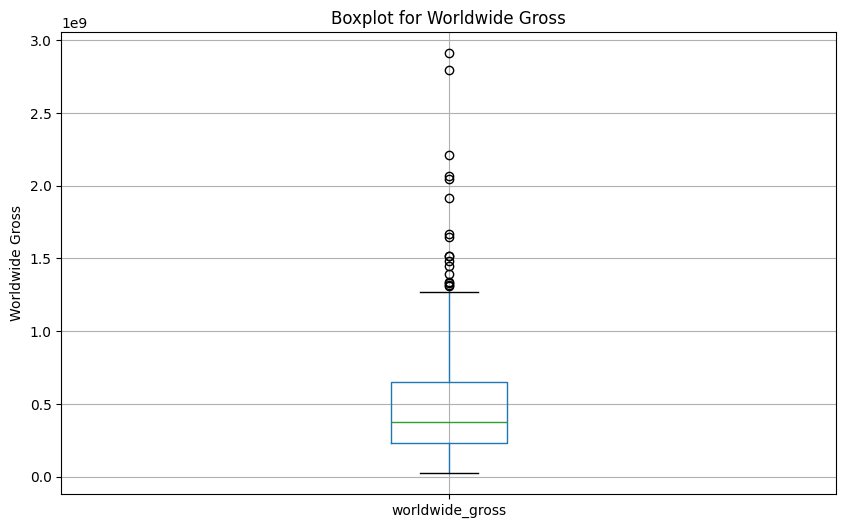

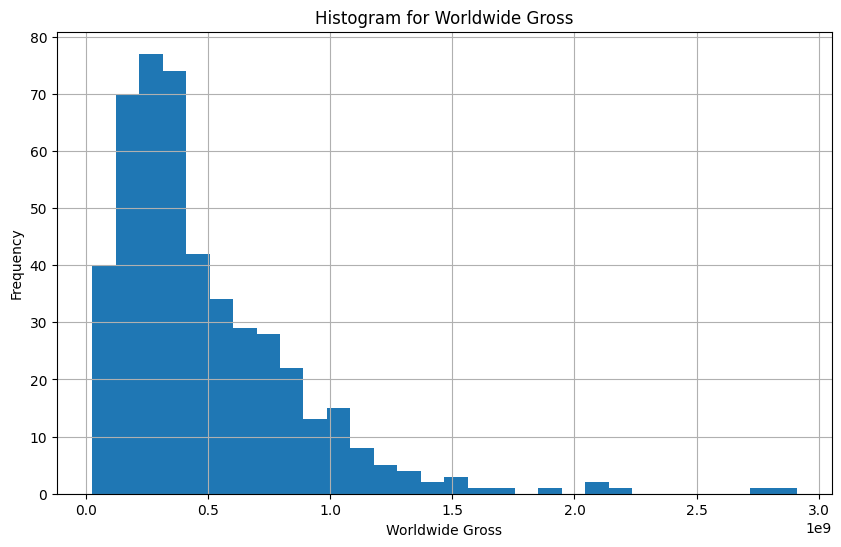

In [40]:

plt.figure(figsize=(10, 6))
cleaned_data.boxplot(column='worldwide_gross')
plt.title('Boxplot for Worldwide Gross')
plt.ylabel('Worldwide Gross')
plt.show()
plt.figure(figsize=(10, 6))
cleaned_data['worldwide_gross'].hist(bins=30)
plt.title('Histogram for Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('Frequency')
plt.show()


### Tworzymy wykres liniowy wraz z linią trendu dla zmiennych production_cost i worldwide_gross

<Figure size 1200x800 with 0 Axes>

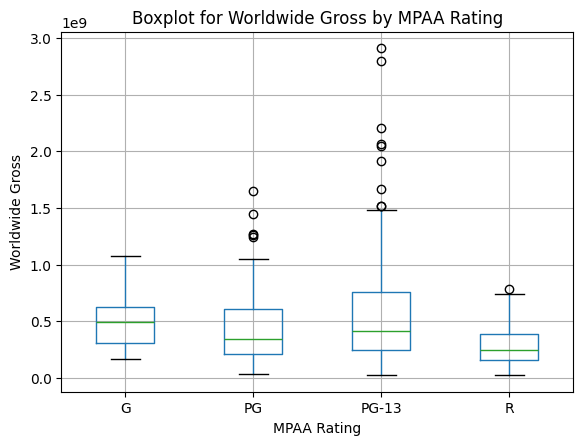

In [41]:
plt.figure(figsize=(12, 8))
cleaned_data.boxplot(column='worldwide_gross', by='mpaa')
plt.title('Boxplot for Worldwide Gross by MPAA Rating')
plt.suptitle('')
plt.xlabel('MPAA Rating')
plt.ylabel('Worldwide Gross')
plt.show()


### Na wykresie widzimy trend wzrostowy, który mówi nam, że budżet ma znaczący wpływ na przychody z filmu

### Sprawdzmy jaki wpływ ma gatunek na przychód filmu

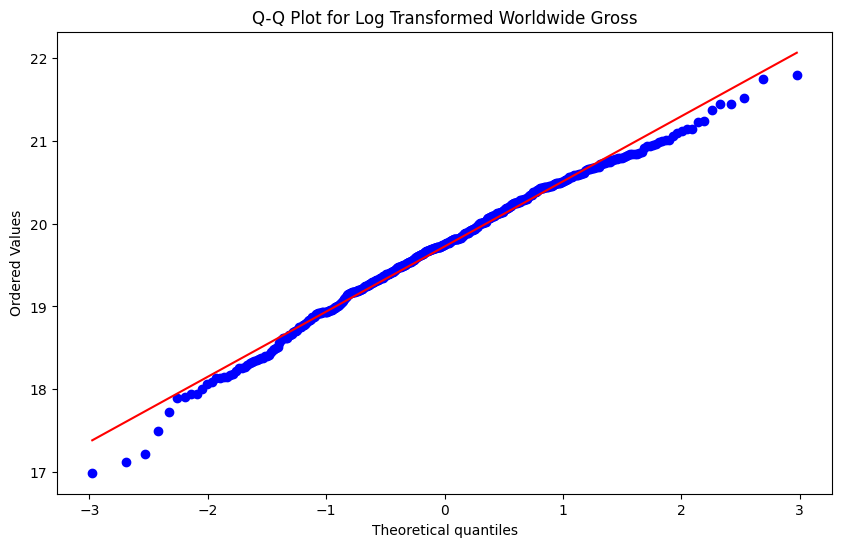

H0: Wartości mają rozkład zgodny z rozkładem normalnym
Kolmogorov-Smirnov Test: Statistics=0.036, p-value=0.570


In [42]:
# Transformacja logarytmiczna zmiennej worldwide_gross
log_worldwide_gross = np.log(cleaned_data['worldwide_gross'] + 1)  # dodajemy 1, aby uniknąć log(0)

plt.figure(figsize=(10, 6))
stats.probplot(log_worldwide_gross, dist="norm", plot=plt)
plt.title('Q-Q Plot for Log Transformed Worldwide Gross')
plt.show()

ks_stat, ks_p = kstest(log_worldwide_gross, 'norm', args=(log_worldwide_gross.mean(), log_worldwide_gross.std()))
print("H0: Wartości mają rozkład zgodny z rozkładem normalnym")
print(f'Kolmogorov-Smirnov Test: Statistics={ks_stat:.3f}, p-value={ks_p:.3f}')

P-value > 0.05 => dane mają rozkład normalny

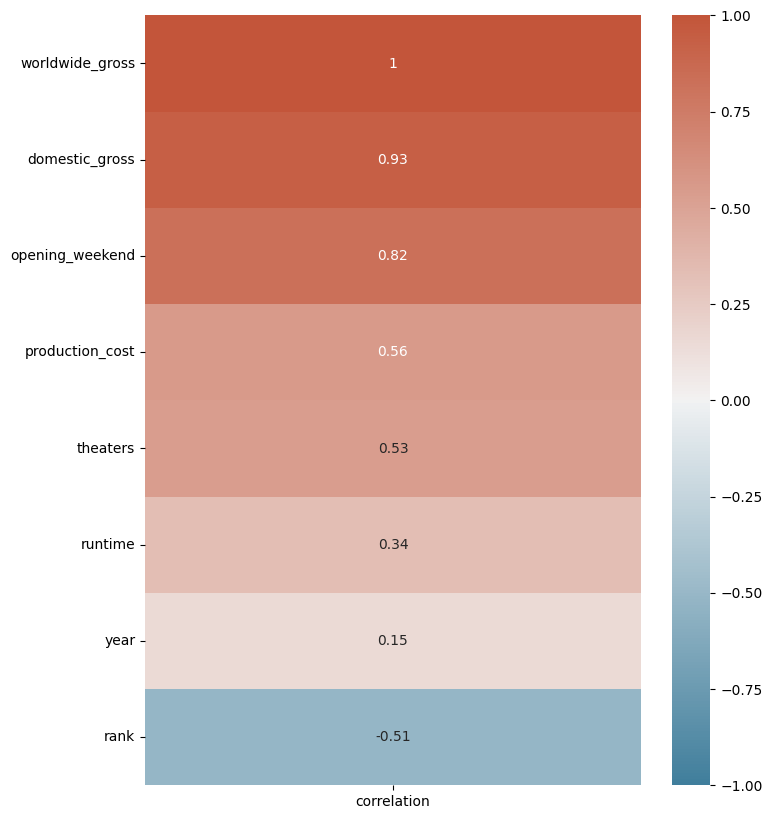

In [43]:
# Compute the correlation with 'worldwide_gross'
corr_with_gross = numeric_cols.corrwith(cleaned_data['worldwide_gross'])

# Convert Series to DataFrame for easier plotting
corr_with_gross = corr_with_gross.to_frame(name='correlation')

# Plot the correlations
plt.figure(figsize=(8, 10))
sns.heatmap(corr_with_gross.sort_values(by='correlation', ascending=False), annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

# Define your features and target variable
X = cleaned_data.drop('worldwide_gross', axis=1)  # assuming 'worldwide_gross' is your target variable
y = cleaned_data['worldwide_gross']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train and y_train are your training data, and X_test and y_test are your testing data

In [57]:
# Define your features and target variable
X = cleaned_data[['opening_weekend']]  # only use 'opening_weekend' as a feature
y = cleaned_data['worldwide_gross']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Make predictions on the train set
y_pred_train = model.predict(X_train)

# Compute the mean squared error of the predictions
mse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mse_train = mean_squared_error(y_train, y_pred_train, squared=False)

# Compute the root mean squared error
rmse_test = mse_test
rmse_train = mse_train

# Compute the coefficient of determination (R^2)
r2_test = model.score(X_test, y_test)

print(f"Test Root Mean Squared Error: {rmse_test}")
print(f"Train Root Mean Squared Error: {rmse_train}")
print(f"Test R^2: {r2_test}")

Test Root Mean Squared Error: 202315940.67948824
Train Root Mean Squared Error: 222523773.9693902
Test R^2: 0.7137857513139236


c:\Users\ssiko\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ssiko\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
